## Import nessessary libraries

In [25]:
import random
import os
from glob import glob
from pathlib import Path

import torch
from IPython.display import Image  # for displaying images
from PIL import Image

random.seed(42)

import logging

logging.getLogger().setLevel(logging.CRITICAL)
# !pip install pylabel > /dev/null

#!pip install pylabel

from pylabel import *
from pylabel import importer


Example annotation in yolo txt format: class_id, x_center, y_center, width, height

In [27]:
# An example annotation
!cat ../data/split_yolo/labels/test/american_pit_bull_terrier_0012.txt

8 0.5001 0.5029 0.9627 0.9923


In [28]:
# An example YAML file
!cat ../data/split_yolo/dataset.yaml

names:
  - dogue_de_bordeaux
  - staffordshire_bullterrier
  - dogo_argentino
  - other_dog_breed
  - cau_ovcharka
  - person
  - human_face
  - am_pit_bull_terrier
  - fila_brasileiro
  - bull_terrier
  - kangal
  - neapolitan_mastiff
  - rottweiler
  - bull_mastiff
  - mastin_espanol
  - tosa_inu
  - am_staffordshire_terrier
  - mastiff
nc: 18
path: /Users/tillmeineke/ML/ML_Zoomcamp2024_hw/helloListenDog/data/split_yolo/
test: /Users/tillmeineke/ML/ML_Zoomcamp2024_hw/helloListenDog/data/split_yolo/images/test
train: /Users/tillmeineke/ML/ML_Zoomcamp2024_hw/helloListenDog/data/split_yolo/images/train
val: /Users/tillmeineke/ML/ML_Zoomcamp2024_hw/helloListenDog/data/split_yolo/images/val


## Getting the Image and annotation folder

Dataset has one folder ("../data/renamed_dub_removed")

In [ ]:
# Define path to stored dataset
img_str = "images"
label_str = "labels"

root_dir = Path("../data/split_yolo/")
# Create dataset dir if not exists
# dataset_dir.mkdir(parents=True, exist_ok=True)


img_dir = root_dir / img_str / "train"
labels_dir = root_dir / label_str / "train"

pd.Series(
    {
        "Dataset Directory": root_dir,
        "Image Directory": img_dir,
        "Labels Directory": labels_dir,
    }
).to_frame().style.hide(axis="columns")


### Get Image File Paths

In [34]:
def get_img_files(
    img_dir: Path,  # The directory to search for image files
    img_fmts=["jpg", "jpeg", "png"],  # The list of image formats to search for
):
    """
    Get all the image files in the given directory.

    Returns:
    img_paths (list): A list of pathlib.Path objects representing the image files
    """
    img_paths = []

    # Use the glob module to search for image files with specified formats
    for fmt in img_fmts:
        img_paths.extend(sorted(glob(f"{img_dir}/*.{fmt}")))
    # Convert the file paths to pathlib.Path objects
    img_paths = [Path(path) for path in img_paths]

    return img_paths

Each image file has a unique name that we can use to locate the corresponding annotation data. We can make a dictionary that maps image names to file paths. The dictionary will allow us to retrieve the file path for a given image more efficiently.

In [35]:
# Get all image files in the 'img_dir' directory
img_dict = {
    file.stem: file  # Create a dictionary that maps file names to file paths
    for file in get_img_files(
        img_dir
    )  # Get a list of image files in the image directory
}

# Print the number of image files
print(f"Number of Images: {len(img_dict)}")

# Display the first five entries from the dictionary using a Pandas DataFrame
pd.DataFrame.from_dict(img_dict, orient="index").head().style.hide(axis="columns")

Number of Images: 1089


In [30]:
img_dir.glob("*")

<generator object Path.glob at 0x116248e10>

In [37]:
annotation_files = list(sorted(labels_dir.glob("*")))
annotation_files[:5]

[PosixPath('../data/split_yolo/labels/train/american_pit_bull_terrier_0001.txt'),
 PosixPath('../data/split_yolo/labels/train/american_pit_bull_terrier_0002.txt'),
 PosixPath('../data/split_yolo/labels/train/american_pit_bull_terrier_0003.txt'),
 PosixPath('../data/split_yolo/labels/train/american_pit_bull_terrier_0004.txt'),
 PosixPath('../data/split_yolo/labels/train/american_pit_bull_terrier_0005.txt')]

In [ ]:
dataset_train = importer.ImportYoloV5(
    path="../data/split_yolo/labels/train",
    path_to_images="../../images/train",
    img_ext="jpg",
    cat_names=[
        "__background__",
        "dogue_de_bordeaux",
        "staffordshire_bullterrier",
        "dogo_argentino",
        "other_dog_breed",
        "cau_ovcharka",
        "person",
        "human_face",
        "am_pit_bull_terrier",
        "fila_brasileiro",
        "bull_terrier",
        "kangal",
        "neapolitan_mastiff",
        "rottweiler",
        "bull_mastiff",
        "mastin_espanol",
        "tosa_inu",
        "am_staffordshire_terrier",
        "mastiff"
    ],
)

In [64]:
dataset_train.df.sort_values(by="img_id").head()

img_folder                 img_filename img_path  img_id  \
id                                                                     
0   ../../images/train  neapolitan_mastiff_0030.jpg                0   
1   ../../images/train  neapolitan_mastiff_0030.jpg                0   
2   ../../images/train          rottweiler_0066.jpg                1   
3   ../../images/train          rottweiler_0072.jpg                2   
4   ../../images/train  neapolitan_mastiff_0024.jpg                3   

    img_width  img_height  img_depth ann_segmented  ann_bbox_xmin  \
id                                                                  
0         844        1500          3                       1.7724   
1         844        1500          3                      -0.0422   
2         360         270          3                      -0.0180   
3         500         333          3                     119.0250   
4        1600        1216          3                      -0.0800   

    ann_bbox_ymin  ...  ann_iscrowd  ann_keypoints  ann_pose  ann_truncated  \
id                 ...                                                        
0         64.5750  ...                                                        
1        306.0000  ...                                                        
2         -0.0135  ...                                                        
3          0.0000  ...                                                        
4         85.9712  ...                                                        

    ann_difficult cat_id            cat_name cat_supercategory split annotated  
id                                                                              
0                     12  neapolitan_mastiff                                 1  
1                      6              person                                 1  
2                     13          rottweiler                                 1  
3                     13          rottweiler                                 1  
4                     12  neapolitan_mastiff                                 1  

[5 rows x 26 columns]

In [65]:
labels_map = {}
for i, label in enumerate(dataset_train.analyze.classes):
    labels_map[i] = label

labels_map

{0: 'dogue_de_bordeaux',
 1: 'staffordshire_bullterrier',
 2: 'dogo_argentino',
 3: 'other_dog_breed',
 4: 'cau_ovcharka',
 5: 'person',
 6: 'human_face',
 7: 'am_pit_bull_terrier',
 8: 'fila_brasileiro',
 9: 'bull_terrier',
 10: 'kangal',
 11: 'neapolitan_mastiff',
 12: 'rottweiler',
 13: 'bull_mastiff',
 14: 'mastin_espanol',
 15: 'tosa_inu',
 16: 'am_staffordshire_terrier',
 17: 'mastiff'}

In [66]:
print(f"Number of images: {dataset_train.analyze.num_images}")
print(f"Number of classes: {dataset_train.analyze.num_classes}")
#print(f"Classes:{dataset.analyze.classes}")
print(f"Class counts:\n{dataset_train.analyze.class_counts}")

Number of images: 1089
Number of classes: 18
Class counts:
cat_name
person                       178
cau_ovcharka                 121
staffordshire_bullterrier    117
bull_mastiff                 116
tosa_inu                     116
am_staffordshire_terrier     103
dogo_argentino                96
rottweiler                    93
human_face                    84
am_pit_bull_terrier           83
fila_brasileiro               71
bull_terrier                  67
dogue_de_bordeaux             66
neapolitan_mastiff            66
kangal                        55
mastiff                       54
mastin_espanol                42
other_dog_breed               33
Name: count, dtype: int64


'neapolitan_mastiff_0030.jpg'

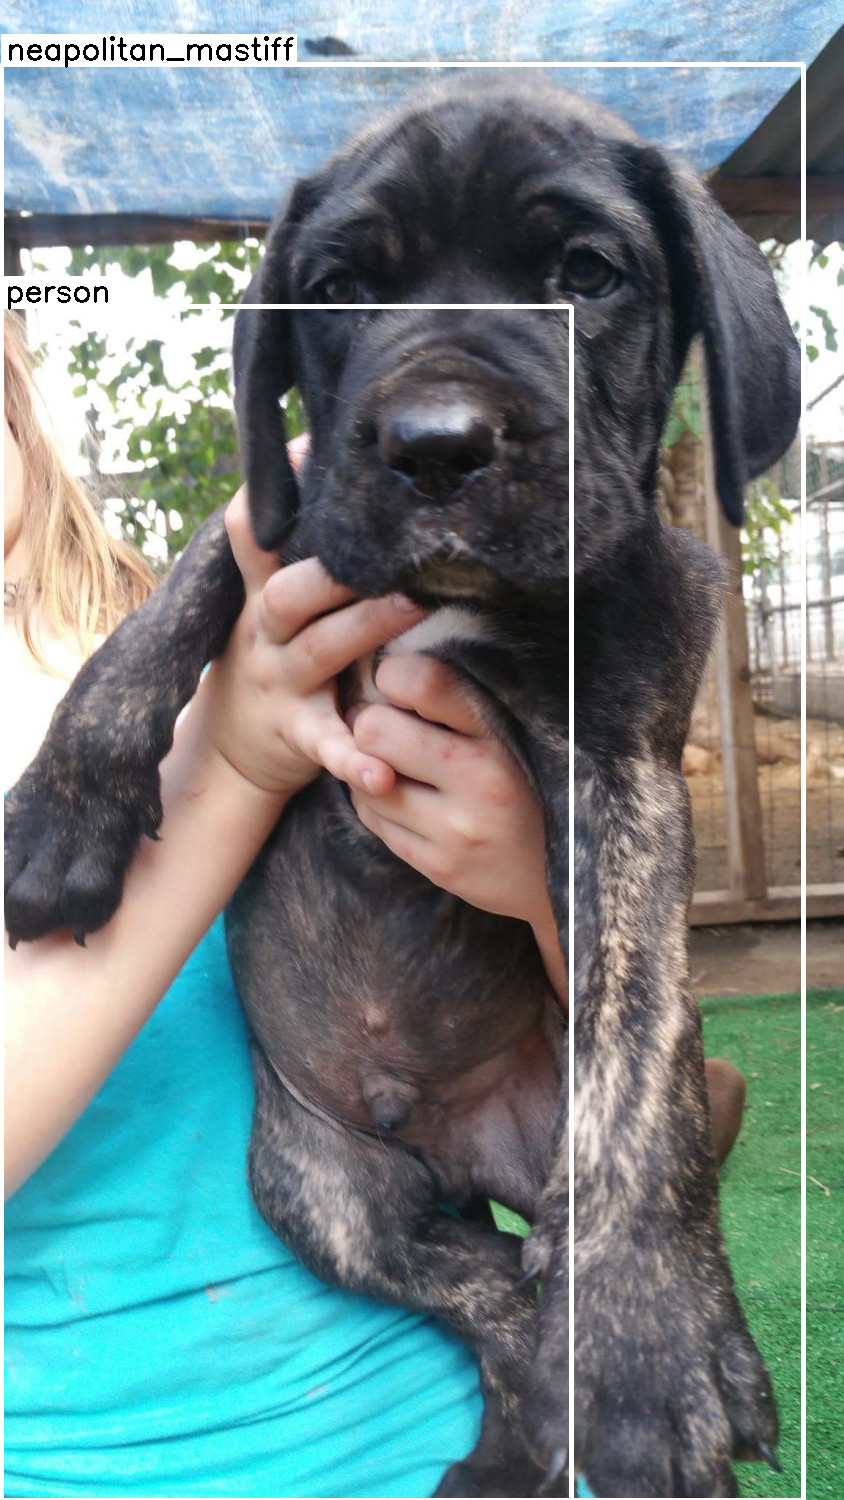

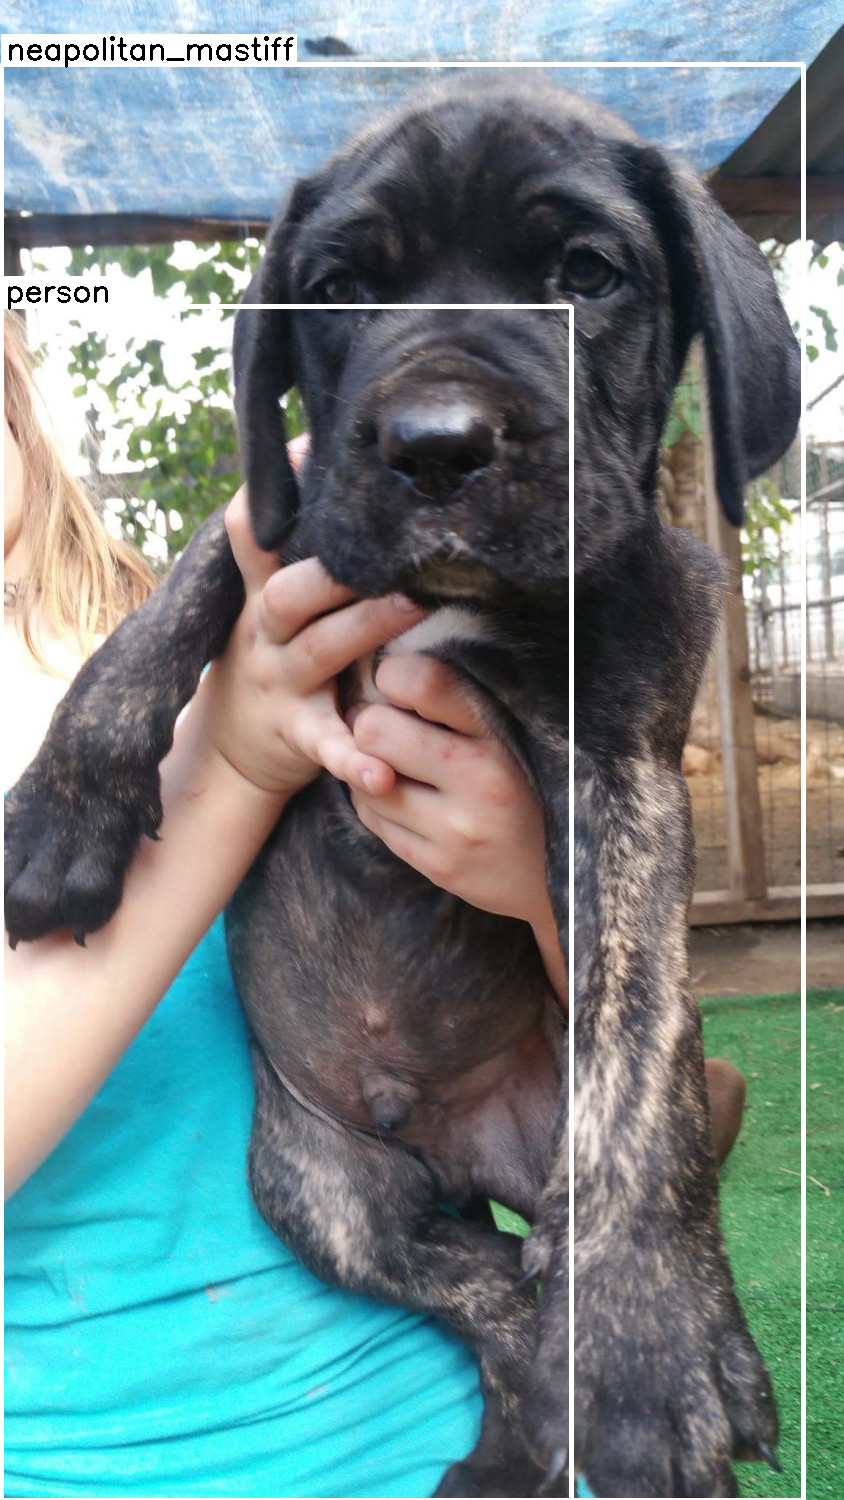

In [72]:
from IPython.display import display

display(dataset_train.df["img_filename"][0], dataset_train.visualize.ShowBoundingBoxes(0))
display(dataset_train.visualize.ShowBoundingBoxes("neapolitan_mastiff_0030.jpg"))

In [23]:
annotation_df = importer.ImportYoloV5WithYaml(
    "../data/split_yolo/dataset.yaml",
    image_ext="jpg",
    name_of_annotations_folder="labels",
    path_to_annotations="../data/split_yolo/labels",
)

Importing YOLO files...: 100%|██████████| 3/3 [00:00<00:00, 553.02it/s]


ValueError: max() arg is an empty sequence

`importer.ImportYoloV5WithYaml()` did not work. Let's investigate why not. Labels and images are there...

In [49]:
# filepath: debug.py
import os
from pathlib import Path

yaml_path = "/Users/tillmeineke/ML/ML_Zoomcamp2024_hw/helloListenDog/data/split_yolo/"
splits = ["train", "val", "test"]

for split in splits:
    img_path = os.path.join(yaml_path, "images", split)
    label_path = os.path.join(yaml_path, "labels", split)
    print(f"Split: {split}")
    print(f"Images exist: {os.path.exists(img_path)}")
    print(f"Labels exist: {os.path.exists(label_path)}")
    if os.path.exists(label_path):
        print(f"Number of labels: {len(os.listdir(label_path))}")

Split: train
Images exist: True
Labels exist: True
Number of labels: 1079
Split: val
Images exist: True
Labels exist: True
Number of labels: 393
Split: test
Images exist: True
Labels exist: True
Number of labels: 279


In [50]:
# filepath: debug.py
import glob

label_files = glob.glob(os.path.join(yaml_path, "labels/**/*.txt"))
print(f"Total label files found: {len(label_files)}")

# Check first label file content
if label_files:
    with open(label_files[0], "r") as f:
        print(f"Sample label content:\n{f.read()}")

Total label files found: 1751
Sample label content:
2 0.4776 0.5251 0.7631 0.8952



In [51]:
import os
from pathlib import Path
from typing import Set, Dict, List


def check_file_matches(yaml_path: str) -> Dict[str, Dict[str, Set[str]]]:
    """
    Compare image and label filenames across train/val/test splits

    Args:
        yaml_path: Path to dataset root directory

    Returns:
        Dict containing filename sets for each split
    """
    splits = ["train", "val", "test"]
    results = {}

    for split in splits:
        # Get paths
        img_path = os.path.join(yaml_path, "images", split)
        label_path = os.path.join(yaml_path, "labels", split)

        # Get filenames without extensions
        img_files = (
            {
                Path(f).stem
                for f in os.listdir(img_path)
                if f.endswith((".jpg", ".jpeg", ".png"))
            }
            if os.path.exists(img_path)
            else set()
        )
        label_files = (
            {Path(f).stem for f in os.listdir(label_path) if f.endswith(".txt")}
            if os.path.exists(label_path)
            else set()
        )

        results[split] = {
            "images": img_files,
            "labels": label_files,
            "missing_labels": img_files - label_files,
            "missing_images": label_files - img_files,
        }

    return results


# Run check
yaml_path = "/Users/tillmeineke/ML/ML_Zoomcamp2024_hw/helloListenDog/data/split_yolo"
results = check_file_matches(yaml_path)

for split, data in results.items():
    print(f"\n{split.upper()} SPLIT:")
    print(f"Images: {len(data['images'])}")
    print(f"Labels: {len(data['labels'])}")
    print(f"Missing labels: {len(data['missing_labels'])}")
    print(f"Missing images: {len(data['missing_images'])}")

    if data["missing_labels"]:
        print(f"Sample missing labels: {list(data['missing_labels'])[:5]}")
    if data["missing_images"]:
        print(f"Sample missing images: {list(data['missing_images'])[:5]}")



TRAIN SPLIT:
Images: 1079
Labels: 1079
Missing labels: 0
Missing images: 0

VAL SPLIT:
Images: 393
Labels: 393
Missing labels: 0
Missing images: 0

TEST SPLIT:
Images: 279
Labels: 279
Missing labels: 0
Missing images: 0


In [52]:
from pathlib import Path
import os
from typing import Set, Dict, List
from collections import defaultdict


def check_matching_files(yaml_path: str) -> Dict:
    """
    Check if image and label filenames match exactly

    Args:
        yaml_path (str): Path to dataset root

    Returns:
        Dict: Results of filename matching analysis
    """
    splits = ["train", "val", "test"]
    results = defaultdict(dict)

    for split in splits:
        # Get paths
        img_dir = Path(yaml_path) / "images" / split
        label_dir = Path(yaml_path) / "labels" / split

        # Get filenames without extensions
        img_files = sorted([f.stem for f in img_dir.glob("*.jpg")])
        label_files = sorted([f.stem for f in label_dir.glob("*.txt")])

        # Check exact matches
        img_set = set(img_files)
        label_set = set(label_files)

        results[split] = {
            "img_files": img_files,
            "label_files": label_files,
            "exact_match": img_set == label_set,
            "img_only": list(img_set - label_set),
            "label_only": list(label_set - img_set),
            "total_imgs": len(img_files),
            "total_labels": len(label_files),
        }

    return results


# Run analysis
yaml_path = "/Users/tillmeineke/ML/ML_Zoomcamp2024_hw/helloListenDog/data/split_yolo"
matches = check_matching_files(yaml_path)

for split, data in matches.items():
    print(f"\n{split.upper()}:")
    print(f"Total images: {data['total_imgs']}")
    print(f"Total labels: {data['total_labels']}")
    print(f"Exact match: {data['exact_match']}")

    if not data["exact_match"]:
        print("Images without labels:", data["img_only"][:5])
        print("Labels without images:", data["label_only"][:5])



TRAIN:
Total images: 1079
Total labels: 1079
Exact match: True

VAL:
Total images: 393
Total labels: 393
Exact match: True

TEST:
Total images: 279
Total labels: 279
Exact match: True


In [111]:
import os
from pathlib import Path
import pandas as pd
from pylabel import importer


def debug_yolo_import(yaml_path: str) -> None:
    """
    Debug YOLO import process with detailed logging

    Args:
        yaml_path: Path to YAML file
    """
    splits = ["train", "val", "test"]
    base_path = Path(yaml_path).resolve().parent

    for split in splits:
        print(f"\n=== Processing {split} ===")

        # Construct absolute paths
        label_path = base_path / "labels" / split
        img_path = base_path / "images" / split

        print(f"Label path: {label_path}")
        print(f"Image path: {img_path}")

        # Try importing single split
        try:
            dataset = importer.ImportYoloV5(
                path=str(label_path), path_to_images=str(img_path), img_ext="jpg"
            )
            print(f"DataFrame shape: {dataset.df.shape}")
            print(
                f"img_id values: {dataset.df['img_id'].unique()[:5]}"
            )  # Show only first 5
            print(f"Sample data:\n{dataset.df.head()}")

        except Exception as e:
            print(f"Error: {str(e)}")


# Run debug with absolute path
yaml_file = Path("../data/split_yolo/dataset.yaml").resolve()
debug_yolo_import(str(yaml_file))


=== Processing train ===
Label path: /Users/tillmeineke/ML/ML_Zoomcamp2024_hw/helloListenDog/data/split_yolo/labels/train
Image path: /Users/tillmeineke/ML/ML_Zoomcamp2024_hw/helloListenDog/data/split_yolo/images/train


Importing YOLO files...:   0%|          | 0/1079 [00:00<?, ?it/s]

Importing YOLO files...:  73%|███████▎  | 787/1079 [00:02<00:00, 357.08it/s]


Error: 'NoneType' object has no attribute 'shape'

=== Processing val ===
Label path: /Users/tillmeineke/ML/ML_Zoomcamp2024_hw/helloListenDog/data/split_yolo/labels/val
Image path: /Users/tillmeineke/ML/ML_Zoomcamp2024_hw/helloListenDog/data/split_yolo/images/val


Importing YOLO files...: 100%|██████████| 393/393 [00:01<00:00, 318.20it/s]


DataFrame shape: (628, 26)
img_id values: [0 1 2 3 4]
Sample data:
                                           img_folder  \
id                                                      
0   /Users/tillmeineke/ML/ML_Zoomcamp2024_hw/hello...   
1   /Users/tillmeineke/ML/ML_Zoomcamp2024_hw/hello...   
2   /Users/tillmeineke/ML/ML_Zoomcamp2024_hw/hello...   
3   /Users/tillmeineke/ML/ML_Zoomcamp2024_hw/hello...   
4   /Users/tillmeineke/ML/ML_Zoomcamp2024_hw/hello...   

                          img_filename img_path  img_id  img_width  \
id                                                                   
0          neapolitan_mastiff_0030.jpg                0        844   
1          neapolitan_mastiff_0030.jpg                0        844   
2                  rottweiler_0072.jpg                1        500   
3   staffordshire_bullterrier_0152.jpg                2        449   
4                    tosa_inu_0104.jpg                3        450   

    img_height  img_depth ann_segmented  a

Importing YOLO files...: 100%|██████████| 279/279 [00:00<00:00, 383.08it/s]

DataFrame shape: (413, 26)
img_id values: [0 1 2 3 4]
Sample data:
                                           img_folder  \
id                                                      
0   /Users/tillmeineke/ML/ML_Zoomcamp2024_hw/hello...   
1   /Users/tillmeineke/ML/ML_Zoomcamp2024_hw/hello...   
2   /Users/tillmeineke/ML/ML_Zoomcamp2024_hw/hello...   
3   /Users/tillmeineke/ML/ML_Zoomcamp2024_hw/hello...   
4   /Users/tillmeineke/ML/ML_Zoomcamp2024_hw/hello...   

                          img_filename img_path  img_id  img_width  \
id                                                                   
0   staffordshire_bullterrier_0146.jpg                0        314   
1                bull_terrier_0035.jpg                1       2217   
2                bull_terrier_0035.jpg                1       2217   
3                    tosa_inu_0110.jpg                2        450   
4                    tosa_inu_0110.jpg                2        450   

    img_height  img_depth ann_segmented  a

in train data:  
`Error: 'NoneType' object has no attribute 'shape'`

Could it be that some images are in the wrong format? Let's check the image format of all images in the training data.

In [108]:
from pathlib import Path
from typing import Dict, List
import os


def debug_yolo_paths(yaml_path: str) -> Dict[str, Dict[str, Path]]:
    """
    Debug YOLO dataset paths and verify file access

    Args:
        yaml_path: Path to YAML file

    Returns:
        Dict containing verified paths
    """
    base_path = Path(yaml_path).parent
    splits = ["train", "val", "test"]
    paths = {}

    for split in splits:
        # Construct absolute paths
        label_path = base_path / "labels" / split
        img_path = base_path / "images" / split

        # Verify first image exists
        first_label = next(label_path.glob("*.txt"))
        img_name = first_label.stem + ".jpg"
        img_file = img_path / img_name

        paths[split] = {
            "label_dir": label_path,
            "image_dir": img_path,
            "sample_label": first_label,
            "sample_image": img_file,
            "exists": img_file.exists(),
        }

    return paths


# Test paths
yaml_file = "../data/split_yolo/dataset.yaml"
path_info = debug_yolo_paths(yaml_file)

for split, info in path_info.items():
    print(f"\n=== {split.upper()} ===")
    print(f"Label dir: {info['label_dir']}")
    print(f"Image dir: {info['image_dir']}")
    print(f"Sample image exists: {info['exists']}")
    print(f"Sample paths:")
    print(f"  Label: {info['sample_label']}")
    print(f"  Image: {info['sample_image']}")


=== TRAIN ===
Label dir: ../data/split_yolo/labels/train
Image dir: ../data/split_yolo/images/train
Sample image exists: True
Sample paths:
  Label: ../data/split_yolo/labels/train/american_pit_bull_terrier_0076.txt
  Image: ../data/split_yolo/images/train/american_pit_bull_terrier_0076.jpg

=== VAL ===
Label dir: ../data/split_yolo/labels/val
Image dir: ../data/split_yolo/images/val
Sample image exists: True
Sample paths:
  Label: ../data/split_yolo/labels/val/neapolitan_mastiff_0030.txt
  Image: ../data/split_yolo/images/val/neapolitan_mastiff_0030.jpg

=== TEST ===
Label dir: ../data/split_yolo/labels/test
Image dir: ../data/split_yolo/images/test
Sample image exists: True
Sample paths:
  Label: ../data/split_yolo/labels/test/staffordshire_bullterrier_0146.txt
  Image: ../data/split_yolo/images/test/staffordshire_bullterrier_0146.jpg


In [55]:
from pathlib import Path
import pandas as pd
from pylabel import importer


def test_yolo_import(yaml_file: str) -> None:
    """
    Test YOLO import with absolute paths

    Args:
        yaml_file (str): Path to YAML config
    """
    # Convert to absolute paths
    base_path = Path(yaml_file).parent.resolve()
    splits = ["train", "val", "test"]

    for split in splits:
        print(f"\n=== Testing {split} ===")

        # Construct absolute paths
        label_dir = base_path / "labels" / split
        img_dir = base_path / "images" / split

        try:
            dataset = importer.ImportYoloV5(
                path=str(label_dir), path_to_images=str(img_dir), img_ext="jpg"
            )
            print(f"Success! Found {len(dataset.df)} annotations")

        except Exception as e:
            print(f"Error importing {split}: {str(e)}")


# Test with absolute paths
yaml_file = Path("../data/split_yolo/dataset.yaml").resolve()
test_yolo_import(str(yaml_file))



=== Testing train ===


Importing YOLO files...:  73%|███████▎  | 787/1079 [00:02<00:00, 300.28it/s]


Error importing train: 'NoneType' object has no attribute 'shape'

=== Testing val ===


Importing YOLO files...: 100%|██████████| 393/393 [00:01<00:00, 258.41it/s]


Success! Found 628 annotations

=== Testing test ===


Importing YOLO files...: 100%|██████████| 279/279 [00:00<00:00, 418.56it/s]

Success! Found 413 annotations


`Error importing train: 'NoneType' object has no attribute 'shape'`

Again, something is fishy.

In [56]:
from pathlib import Path
import cv2
import numpy as np
from typing import Dict, List, Tuple


def debug_train_images(base_path: str) -> Tuple[List[str], List[str]]:
    """
    Debug train split images for loading issues

    Args:
        base_path: Path to dataset root

    Returns:
        Tuple of valid and invalid image paths
    """
    train_path = Path(base_path) / "images" / "train"
    valid_images = []
    invalid_images = []

    for img_path in sorted(train_path.glob("*.jpg")):
        try:
            # Attempt to load image
            img = cv2.imread(str(img_path))
            if img is None:
                invalid_images.append(str(img_path))
            else:
                valid_images.append(str(img_path))
        except Exception as e:
            invalid_images.append(f"{str(img_path)}: {str(e)}")

    return valid_images, invalid_images


# Test train split
base_path = "../data/split_yolo"
valid, invalid = debug_train_images(base_path)

print(f"Valid images: {len(valid)}")
print(f"Invalid images: {len(invalid)}")
if invalid:
    print("\nProblem files:")
    for f in invalid:
        print(f"  - {f}")


Valid images: 1078
Invalid images: 1

Problem files:
  - ../data/split_yolo/images/train/dogue_de_bordeaux_0088.jpg


![](/Users/tillmeineke/ML/ML_Zoomcamp2024_hw/helloListenDog/data/raw/143_dog_breeds/dogue_de_bordeaux/Image_88.gif)

Got, it. The image is not in the right format. It's a `gif`.

In [60]:
import subprocess
from pathlib import Path


def check_file_info(file_path: str) -> str:
    """
    Get file info using file command

    Args:
        file_path: Path to image file

    Returns:
        str: File command output
    """
    result = subprocess.run(["file", file_path], capture_output=True, text=True)
    return result.stdout.strip()


# Check specific file
target_file = "/Users/tillmeineke/ML/ML_Zoomcamp2024_hw/helloListenDog/data/split_yolo/images/train/dogue_de_bordeaux_0088.jpg"
print(check_file_info(target_file))

/Users/tillmeineke/ML/ML_Zoomcamp2024_hw/helloListenDog/data/split_yolo/images/train/dogue_de_bordeaux_0088.jpg: GIF image data, version 89a, 400 x 300


In [61]:
from PIL import Image
from pathlib import Path
from typing import Tuple


def check_gif_frames(image_path: str) -> Tuple[int, bool]:
    """
    Check number of frames in image file

    Args:
        image_path: Path to image file

    Returns:
        Tuple[int, bool]: Number of frames, is_gif flag
    """
    img = Image.open(image_path)

    try:
        n_frames = img.n_frames
        print(f"Image has {n_frames} frames")
        return n_frames, True
    except AttributeError:
        print("Not an animated image")
        return 1, False


# Check image
image_path = "/Users/tillmeineke/ML/ML_Zoomcamp2024_hw/helloListenDog/data/split_yolo/images/train/dogue_de_bordeaux_0088.jpg"
frames, is_gif = check_gif_frames(image_path)


Image has 2 frames


In [3]:
image_path = "/Users/tillmeineke/ML/ML_Zoomcamp2024_hw/helloListenDog/data/split_yolo/images/train/dogue_de_bordeaux_0088.jpg"
img = Image.open(image_path)
type(img)

PIL.GifImagePlugin.GifImageFile

In [10]:
print(img.format, img.size, img.mode)

GIF (400, 300) P


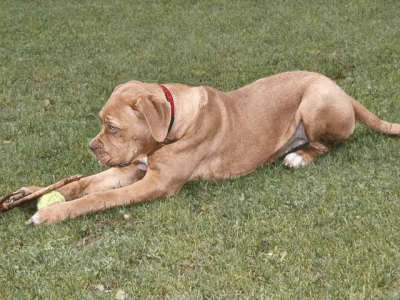

In [88]:
from IPython.display import display

display(img)

In [85]:
img.seek(0)

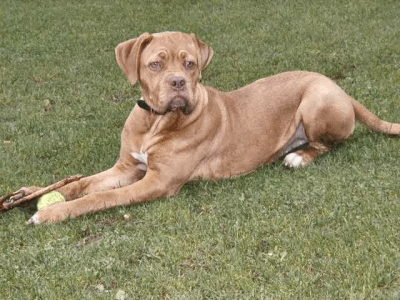

In [86]:
display(img)

In [23]:
img_width, img_height = img.size

In [ ]:
# open corresponding label file


label_path = "/Users/tillmeineke/ML/ML_Zoomcamp2024_hw/helloListenDog/data/split_yolo/labels/train/dogue_de_bordeaux_0088.txt"
with open(label_path, "r") as f:
    label = f.read().strip("\n")
    class_id = label.split(" ")[0]
    bbcenter_x, bbcenter_y, width, height = (
        label.split(" ")[1:][0],
        label.split(" ")[1:][1],
        label.split(" ")[1:][2],
        label.split(" ")[1:][3],
    )

In [43]:
print(class_id, bbcenter_x, bbcenter_y, width, height)

1 0.5136 0.4267 0.9733 0.6517


class_id center_x center_y width height

Note: To convert to normalized xywh from pixel values, divide x (and width) by the image's width and divide y (and height) by the image's height.

In [52]:
bbcenter_x_px = float(bbcenter_x) * img_width
bbcenter_y_px = float(bbcenter_y) * img_height
width_px = float(width) * img_width
height_px = float(height) * img_height
bbox_xywh = [int(bbcenter_x_px), int(bbcenter_y_px), int(width_px), int(height_px)]

In [58]:
bbox_xyxy = [
    int(bbox_xywh[0] - bbox_xywh[2] / 2),
    int(bbox_xywh[1] - bbox_xywh[3] / 2),
    int(bbox_xywh[0] + bbox_xywh[2] / 2),
    int(bbox_xywh[1] + bbox_xywh[3] / 2),
]

In [59]:
bbox_xyxy

[10, 30, 399, 225]

In [90]:
classes = [
    "dogue_de_bordeaux",
    "staffordshire_bullterrier",
    "dogo_argentino",
    "other_dog_breed",
    "cau_ovcharka",
    "person",
    "human_face",
    "am_pit_bull_terrier",
    "fila_brasileiro",
    "bull_terrier",
    "kangal",
    "neapolitan_mastiff",
    "rottweiler",
    "bull_mastiff",
    "mastin_espanol",
    "tosa_inu",
    "am_staffordshire_terrier",
    "mastiff",
]

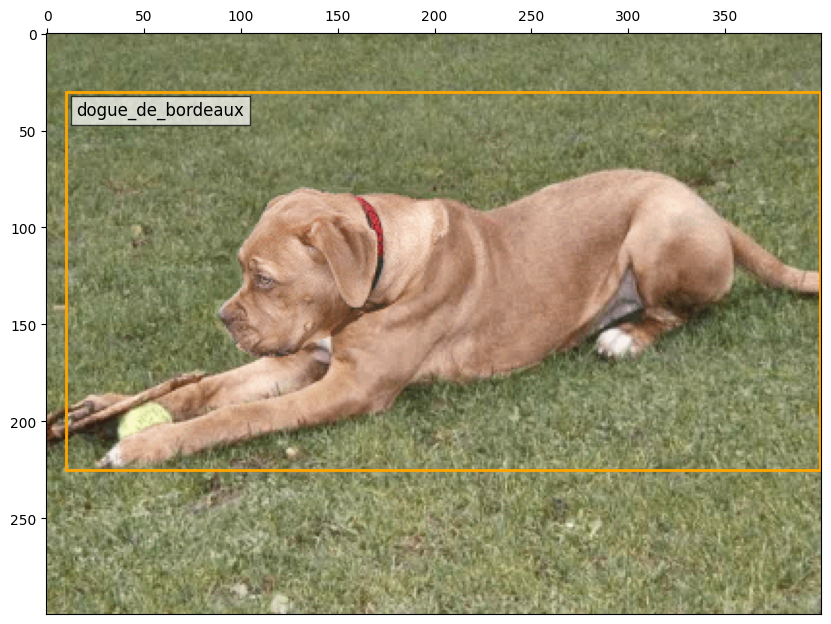

In [106]:
# plot image with bounding box in matplotlib
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle

# Get class name from class_id
class_name = classes[int(class_id) - 1]

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Display image
ax.imshow(img)

# Create a Rectangle patch
rect = Rectangle(
    (bbox_xyxy[0], bbox_xyxy[1]),  # (x,y) of bottom-left corner
    bbox_xyxy[2] - bbox_xyxy[0],  # width
    bbox_xyxy[3] - bbox_xyxy[1],  # height
    linewidth=2,
    edgecolor="orange",
    facecolor="none",
)

# Add the rectangle to the plot
plt.gca().add_patch(rect)

# Add class label with actual class name
plt.text(
    bbox_xyxy[0] + 5,
    bbox_xyxy[1] + 12,  # Position text just above the box
    f"{class_name}",
    color="black",
    fontsize=12,
    bbox=dict(facecolor="white", alpha=0.7),
)

# Remove axis ticks
# ax.axis("off")
ax.xaxis.set_ticks_position("top")
ax.xaxis.set_label_position("top")
plt.show()

In [60]:
img_crop = img.crop(bbox_xyxy)

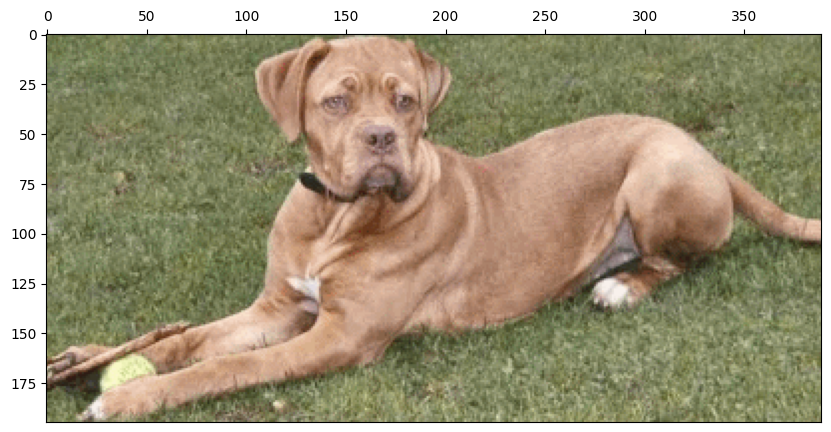

In [ ]:
# img_crop.show()
# print with matplotlib


# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Display image
ax.imshow(img_crop)

# Move x axis to top
ax.xaxis.set_ticks_position("top")
ax.xaxis.set_label_position("top")

# Add grid
ax.grid(False)

plt.show()


In [20]:
from pathlib import Path
import yaml
import cv2
import numpy as np
from typing import Dict, List, Tuple
from tqdm import tqdm


def verify_dataset_structure(yaml_path: str) -> Dict:
    """
    Verify YOLO dataset structure and paths

    Args:
        yaml_path: Path to dataset YAML file

    Returns:
        Dict with verification results
    """
    try:
        # Load YAML
        with open(yaml_path, "r") as f:
            cfg = yaml.safe_load(f)

        base_dir = Path(yaml_path).parent
        results = {
            "yaml_valid": True,
            "splits": {},
            "classes": cfg.get("names", []),
            "num_classes": cfg.get("nc", 0),
        }

        # Check each split
        for split in ["train", "val", "test"]:
            split_path = Path(cfg.get(split, ""))
            img_dir = base_dir / "images" / split
            label_dir = base_dir / "labels" / split

            results["splits"][split] = {
                "img_dir_exists": img_dir.exists(),
                "label_dir_exists": label_dir.exists(),
                "num_images": len(list(img_dir.glob("*.jpg")))
                if img_dir.exists()
                else 0,
                "num_labels": len(list(label_dir.glob("*.txt")))
                if label_dir.exists()
                else 0,
            }

            # Verify sample image loads
            if results["splits"][split]["num_images"] > 0:
                sample_img = next(img_dir.glob("*.jpg"))
                img = cv2.imread(str(sample_img))
                results["splits"][split]["sample_img_loads"] = img is not None

        return results

    except Exception as e:
        return {"error": str(e)}


# Test dataset structure
yaml_path = "../data/split_yolo/dataset.yaml"
results = verify_dataset_structure(yaml_path)
print("Dataset Verification Results:")
print(f"Classes: {len(results['classes'])}")
print("\nSplit Status:")
for split, info in results["splits"].items():
    print(f"\n{split.upper()}:")
    for k, v in info.items():
        print(f"  {k}: {v}")


Dataset Verification Results:
Classes: 18

Split Status:

TRAIN:
  img_dir_exists: True
  label_dir_exists: True
  num_images: 1080
  num_labels: 1080
  sample_img_loads: True

VAL:
  img_dir_exists: True
  label_dir_exists: True
  num_images: 393
  num_labels: 393
  sample_img_loads: True

TEST:
  img_dir_exists: True
  label_dir_exists: True
  num_images: 279
  num_labels: 279
  sample_img_loads: True


In [21]:
annotation_df = importer.ImportYoloV5WithYaml(
    yaml_file="/Users/tillmeineke/ML/ML_Zoomcamp2024_hw/helloListenDog/data/split_yolo/dataset.yaml",
    image_ext="jpg",
    name_of_annotations_folder="labels",
    path_to_annotations="/Users/tillmeineke/ML/ML_Zoomcamp2024_hw/helloListenDog/data/split_yolo/labels",
)


Importing YOLO files...: 100%|██████████| 3/3 [00:00<00:00, 1952.96it/s]


ValueError: max() arg is an empty sequence

In [22]:
annotation_df = importer.ImportYoloV5WithYaml(
    "../data/split_yolo/dataset.yaml",
    image_ext="jpg",
    name_of_annotations_folder="labels",
    path_to_annotations="../data/split_yolo/labels/",
)

Importing YOLO files...: 100%|██████████| 3/3 [00:00<00:00, 1636.48it/s]


ValueError: max() arg is an empty sequence

In [ ]:
# read the first annotation file

annotation_file = annotation_files[0]

with open(annotation_file, "r") as file:
    lines = file.readlines()
    for line in lines:
        print(line.strip())

NameError: name 'annotation_files' is not defined

In [7]:
import torchvision
from torchvision import transforms as T


## Load Model for inspection

In [22]:
model = torchvision.models.detection.ssd300_vgg16(pretrained=True)

/opt/homebrew/Caskroom/miniforge/base/envs/helloDogBreed/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/helloDogBreed/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=SSD300_VGG16_Weights.COCO_V1`. You can also use `weights=SSD300_VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/ssd300_vgg16_coco-b556d3b4.pth" to /Users/tillmeineke/.cache/torch/hub/checkpoints/ssd300_vgg16_coco-b556d3b4.pth
100%|██████████| 136M/136M [00:21<00:00, 6.69MB/s] 


In [23]:
model.eval()

SSD(
  (backbone): SSDFeatureExtractorVGG(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace=True)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inplace=

In [28]:
ig = Image.open("../data/raw/143_dog_breeds/bull_terrier/Image_100.JPG")

In [29]:
transform = T.ToTensor()
img = transform(ig)

In [30]:
with torch.no_grad():
    prediction = model([img])

In [32]:
prediction

[{'boxes': tensor([[1.3343e+01, 3.8110e+00, 4.1904e+02, 3.2028e+02],
          [1.2582e+01, 0.0000e+00, 4.2223e+02, 3.2378e+02],
          [2.3101e+02, 0.0000e+00, 3.8221e+02, 5.4556e+01],
          [2.6924e+02, 1.4317e+02, 3.2277e+02, 1.8152e+02],
          [2.7222e+02, 1.5367e+02, 2.9613e+02, 1.7300e+02],
          [2.9227e+02, 1.3697e+02, 3.3680e+02, 1.8014e+02],
          [3.1990e+02, 0.0000e+00, 3.7721e+02, 4.5855e+01],
          [2.8552e+02, 1.5603e+02, 3.0297e+02, 1.7224e+02],
          [3.0318e+02, 0.0000e+00, 3.4836e+02, 4.6430e+01],
          [2.5980e+02, 1.5238e+02, 3.0527e+02, 1.8938e+02],
          [2.8394e+02, 1.4727e+02, 3.0438e+02, 1.6488e+02],
          [2.2789e+02, 0.0000e+00, 2.8792e+02, 5.1474e+01],
          [2.1617e+02, 0.0000e+00, 3.1443e+02, 1.0101e+02],
          [2.6220e+02, 0.0000e+00, 3.6315e+02, 1.0493e+02],
          [2.7507e+02, 0.0000e+00, 3.2826e+02, 4.4219e+01],
          [2.7581e+02, 1.6565e+02, 2.9429e+02, 1.8070e+02],
          [2.3164e+02, 1.7053e+

In [33]:
type(prediction)

list

In [37]:
type(prediction[0])

dict

In [35]:
prediction[0].keys()

dict_keys(['boxes', 'scores', 'labels'])

In [39]:
bboxes, scores, labels = (
    prediction[0]["boxes"],
    prediction[0]["scores"],
    prediction[0]["labels"],
)

In [41]:
scores

tensor([0.9244, 0.1176, 0.0655, 0.0653, 0.0536, 0.0532, 0.0529, 0.0513, 0.0511,
        0.0503, 0.0503, 0.0493, 0.0478, 0.0473, 0.0452, 0.0448, 0.0443, 0.0440,
        0.0432, 0.0431, 0.0426, 0.0423, 0.0416, 0.0414, 0.0408, 0.0403, 0.0383,
        0.0380, 0.0380, 0.0372, 0.0364, 0.0350, 0.0349, 0.0348, 0.0348, 0.0341,
        0.0337, 0.0327, 0.0325, 0.0325, 0.0317, 0.0316, 0.0315, 0.0313, 0.0309,
        0.0309, 0.0308, 0.0300, 0.0297, 0.0295, 0.0290, 0.0288, 0.0284, 0.0281,
        0.0277, 0.0276, 0.0276, 0.0271, 0.0270, 0.0269, 0.0269, 0.0267, 0.0265,
        0.0264, 0.0262, 0.0262, 0.0260, 0.0253, 0.0249, 0.0249, 0.0248, 0.0244,
        0.0243, 0.0238, 0.0232, 0.0231, 0.0225, 0.0224, 0.0224, 0.0223, 0.0220,
        0.0218, 0.0217, 0.0214, 0.0214, 0.0212, 0.0212, 0.0210, 0.0207, 0.0206,
        0.0203, 0.0200, 0.0200, 0.0199, 0.0199, 0.0196, 0.0194, 0.0191, 0.0191,
        0.0190, 0.0190, 0.0189, 0.0189, 0.0188, 0.0188, 0.0183, 0.0180, 0.0173,
        0.0173, 0.0172, 0.0171, 0.0169, 

In [42]:
labels

tensor([18, 19,  1, 56, 56, 56,  1, 56,  1, 56, 56,  1,  1,  1,  1, 56, 56,  1,
        56, 56,  1, 56, 56,  1, 56, 56, 56,  1,  1, 56,  1, 56, 56, 56,  1, 56,
         1, 16, 56, 18, 56, 56, 56,  1, 56, 56, 24,  1, 56,  1, 56, 56, 18,  1,
        56,  1, 56, 56, 18,  1,  1,  1, 56, 56, 16, 56,  1,  1, 18,  1, 18,  1,
         1,  1, 56, 56, 56, 56, 24, 56, 24, 56, 24, 56, 56, 56,  1, 56, 56,  1,
        56, 56, 20, 16,  1,  1,  1, 20, 56, 18, 56,  1, 56, 56, 56, 56,  1, 56,
        18, 56, 56, 56, 56, 20, 18, 24, 56, 20, 24,  1,  1, 20, 18,  1,  1, 18,
        56, 56, 20, 56, 56, 20,  1,  1,  1, 20, 56, 56, 56, 20,  1,  1, 56, 57,
        24,  1, 20, 24,  1, 56, 56, 20,  1, 20,  1, 16, 64, 18, 18, 20, 34, 56,
         1,  1,  1, 18,  1, 18,  1, 20, 56, 56, 56, 20, 20, 20, 56, 20, 56, 18,
        20, 48, 56, 16, 56,  1, 18, 56, 56, 49,  1, 24, 56, 20,  1, 56,  1, 18,
         1, 16])

In [44]:
labels

torch.Size([200])